<a href="https://colab.research.google.com/github/ggpp200/corap/blob/master/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

1. train.csv : 학습 데이터

id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질

YearBuilt : 완공 연도

YearRemodAdd : 리모델링 연도


ExterQual : 외관 재료 품질

BsmtQual : 지하실 높이

TotalBsmtSF : 지하실 면적 

1stFlrSF : 1층 면적 

GrLivArea : 지상층 생활 면적

FullBath : 지상층 화장실 개수 

KitchenQual : 부억 품질 

GarageYrBlt : 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적 

target : 집값(달러 단위)





2.test.csv

id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질

YearBuilt : 완공 연도

YearRemodAdd : 리모델링 연도

ExterQual : 외관 재료 품질

BsmtQual : 지하실 높이

TotalBsmtSF : 지하실 면적 

1stFlrSF : 1층 면적 

GrLivArea : 지상층 생활 면적

FullBath : 지상층 화장실 개수 

KitchenQual : 부억 품질 

GarageYrBlt : 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적 



3.sample_submission.csv 
id : 데이터 고유 id
target : 집값(달러 단위)

In [5]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [6]:
test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [7]:
train.tail()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000
1349,1350,5,907,TA,1,343,TA,907,907,Gd,1,1978,1978,1978,140000


In [8]:
test.tail()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004
1349,1350,5,2337,TA,2,560,TA,662,1422,TA,2,1900,1950,1945


In [9]:
len(train.columns)

15

In [10]:
len(test.columns)

14

In [11]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [12]:
train.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [13]:
test.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.237037,1524.071111,1.871852,499.867407,1101.222222,1175.714815,1.597778,1973.537778,1985.258519,1978.457037
std,389.855743,1.370057,514.410852,0.651639,186.267579,431.641042,406.858231,0.549002,29.799448,20.818442,25.771750
min,1.000000,2.000000,407.000000,1.000000,160.000000,173.000000,407.000000,0.000000,1879.000000,1950.000000,1895.000000
25%,338.250000,5.000000,1169.750000,1.000000,365.250000,825.250000,887.250000,1.000000,1956.000000,1966.000000,1961.000000
50%,675.500000,6.000000,1472.500000,2.000000,484.000000,1024.000000,1098.000000,2.000000,1976.000000,1995.000000,1982.000000
75%,1012.750000,7.000000,1742.250000,2.000000,578.750000,1338.750000,1409.500000,2.000000,2002.000000,2004.000000,2002.000000
max,1350.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,5095.000000,4.000000,2010.000000,2010.000000,2010.000000


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [16]:
p = train.groupby('Overall Qual')['target'].describe()
p

,count,mean,std,min,25%,50%,75%,max
Overall Qual,,,,,,,,
2,3.0,43366.666667,35301.713193,12789.0,24050.0,35311.0,58655.5,82000.0
3,8.0,92334.375000,25537.888300,58500.0,72250.0,93000.0,109750.0,126175.0
4,75.0,108232.733333,25180.460648,50000.0,86500.0,108500.0,125500.0,170000.0
5,379.0,136439.781003,25217.022583,55993.0,122500.0,135000.0,149900.0,257000.0
6,351.0,163546.358974,36497.108286,76000.0,140000.0,159000.0,183250.0,272000.0
7,307.0,206394.495114,43572.354592,82500.0,178000.0,202500.0,229900.0,383970.0
8,156.0,273767.096154,57321.506299,150000.0,231500.0,275000.0,307000.0,441929.0
9,56.0,369155.803571,67628.558120,277500.0,319900.0,352500.0,404250.0,591587.0
10,15.0,453556.066667,126111.743129,310000.0,365000.0,426000.0,505000.0,745000.0


In [17]:
train["Year Built"].describe()

count    1350.000000
mean     1972.987407
std        29.307257
min      1880.000000
25%      1955.000000
50%      1976.000000
75%      2002.000000
max      2010.000000
Name: Year Built, dtype: float64

In [18]:
p['count']

Overall Qual
2       3.0
3       8.0
4      75.0
5     379.0
6     351.0
7     307.0
8     156.0
9      56.0
10     15.0
Name: count, dtype: float64

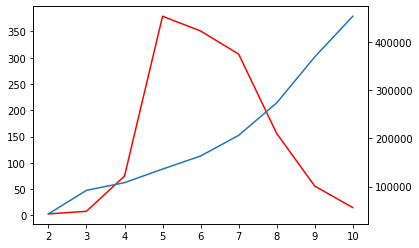

In [19]:
plt.plot(p['count'], color='red')
plt.twinx()
plt.plot(p['mean'])
#전반적 재료와 마감 품질

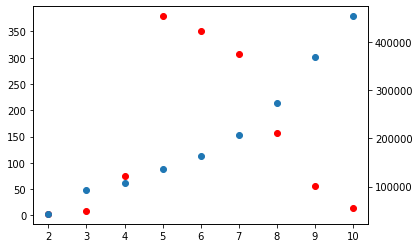

In [20]:
plt.scatter(p.index, p['count'], color='red')
plt.twinx()
plt.scatter(p.index, p['mean'])

In [21]:
p['count'].iloc[2]

75.0

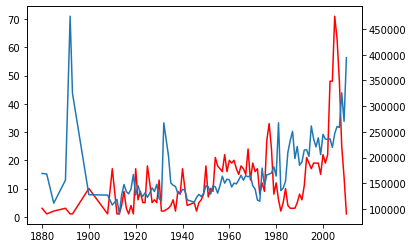

In [22]:
plt.plot(train.groupby("Year Built")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Year Built")['target'].describe()["mean"])
#완공 연도


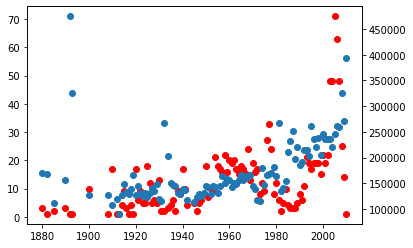

In [23]:
plt.scatter(train.groupby("Year Built")['target'].describe().index, train.groupby("Year Built")['target'].describe()['count'], color='red')
plt.twinx()
plt.scatter(train.groupby("Year Built")['target'].describe().index, train.groupby("Year Built")['target'].describe()['mean'])

In [24]:
train[ train['target'] > 350000]

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
8,9,8,2649,Gd,3,746,Gd,1479,1515,Ex,2,2001,2002,2001,421250
28,29,9,1792,Gd,3,874,Ex,1792,1792,Ex,2,2003,2004,2003,374000
42,43,9,1800,Ex,3,944,Ex,1800,1800,Ex,2,2007,2008,2008,370967
94,95,9,2772,Ex,3,754,Ex,1776,1794,Ex,3,2007,2007,2007,462000
107,108,9,2000,Ex,3,722,Ex,1910,2000,Ex,2,2005,2005,2005,470000
163,164,8,2522,Gd,2,564,Gd,2208,2522,Ex,2,2004,2005,2004,375000
218,219,9,1842,Gd,3,894,Gd,1842,1842,Ex,0,1981,1987,1981,385000
245,246,8,1652,Ex,2,482,Gd,1600,1652,Ex,2,2008,2008,2008,392500
273,274,7,2036,TA,2,513,TA,2136,2036,Gd,2,1965,1965,1965,375000


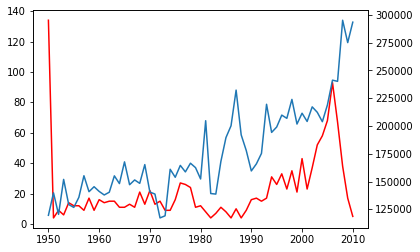

In [25]:
plt.plot(train.groupby("Year Remod/Add")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Year Remod/Add")['target'].describe()["mean"])
# 

In [26]:
train.groupby("Year Remod/Add")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Year Remod/Add,,,,,,,,
1950,134.0,119680.582090,33034.198362,35311.0,103125.00,119450.0,138765.25,256000.0
1951,4.0,139875.000000,11946.931266,126000.0,134625.00,139250.0,144500.00,155000.0
1952,9.0,120499.222222,26209.261349,55993.0,116000.00,124500.0,135000.00,146500.0
1953,6.0,151983.333333,39007.200190,112900.0,131500.00,144500.0,154500.00,225000.0
1954,14.0,129371.428571,33546.372693,80400.0,110250.00,122750.0,142850.00,224000.0
...,...,...,...,...,...,...,...,...
2006,93.0,241285.483871,94775.748606,85000.0,174190.00,217000.0,300000.00,556581.0
2007,67.0,240220.283582,83215.143666,112000.0,178497.00,231713.0,286731.50,591587.0
2008,38.0,295211.736842,93344.571438,131000.0,219516.75,297450.0,368225.25,475000.0


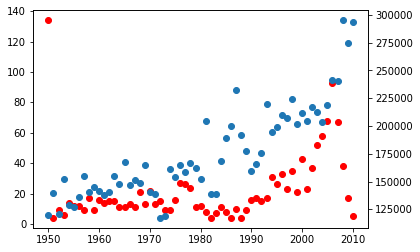

In [27]:
plt.scatter(train.groupby("Year Remod/Add")['target'].describe().index, train.groupby("Year Remod/Add")['target'].describe()['count'], color='red')
plt.twinx()
plt.scatter(train.groupby("Year Remod/Add")['target'].describe().index, train.groupby("Year Remod/Add")['target'].describe()['mean'])
#리모델링 연도

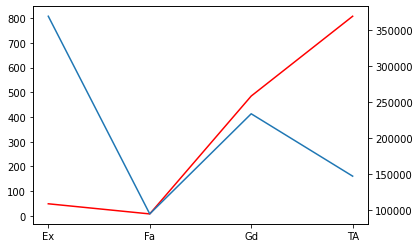

In [28]:
plt.plot(train.groupby("Exter Qual")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Exter Qual")['target'].describe()["mean"])
#외관 재료 품질

In [29]:
train.groupby("Exter Qual")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Exter Qual,,,,,,,,
Ex,49.0,369636.122449,85921.431829,176500.0,319900.00,345000.0,415000.0,615000.0
Fa,8.0,95092.875000,28837.697409,50000.0,75498.25,107500.0,117125.0,122250.0
Gd,485.0,234161.577320,73779.045644,75000.0,184000.00,219990.0,272000.0,745000.0
TA,808.0,147533.717822,39601.911340,12789.0,124000.00,142312.5,165062.5,375000.0


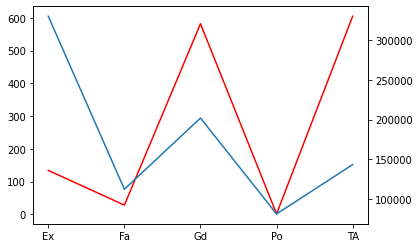

In [30]:
plt.plot(train.groupby("Bsmt Qual")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Bsmt Qual")['target'].describe()["mean"])
#지하실 높이

In [31]:
train.groupby("Bsmt Qual")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Bsmt Qual,,,,,,,,
Ex,134.0,330505.186567,97949.536196,123500.0,276375.00,323631.0,378750.0,745000.0
Fa,28.0,112046.785714,40304.622275,12789.0,89492.75,105000.0,127500.0,206900.0
Gd,582.0,201927.286942,55580.727920,80000.0,163125.00,193000.0,230837.0,475000.0
Po,1.0,80900.000000,NaN,80900.0,80900.00,80900.0,80900.0,80900.0
TA,605.0,143175.100826,39974.869828,35311.0,121000.00,137500.0,157900.0,475000.0


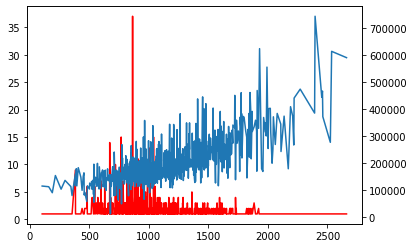

In [32]:
plt.plot(train.groupby("Total Bsmt SF")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Total Bsmt SF")['target'].describe()["mean"])
#지하실 면적

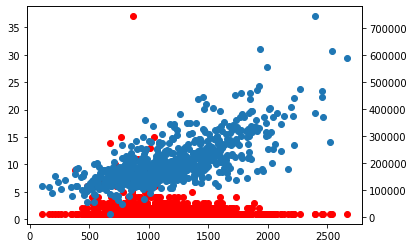

In [33]:
plt.scatter(train.groupby("Total Bsmt SF")['target'].describe().index, train.groupby("Total Bsmt SF")['target'].describe()['count'], color='red')
plt.twinx()
plt.scatter(train.groupby("Total Bsmt SF")['target'].describe().index, train.groupby("Total Bsmt SF")['target'].describe()['mean'])
#지하실 면적

In [34]:
train.groupby("Total Bsmt SF")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Total Bsmt SF,,,,,,,,
105,1.0,116000.0,NaN,116000.0,116000.0,116000.0,116000.0,116000.0
160,1.0,113500.0,NaN,113500.0,113500.0,113500.0,113500.0,113500.0
190,1.0,91300.0,NaN,91300.0,91300.0,91300.0,91300.0,91300.0
216,1.0,155000.0,NaN,155000.0,155000.0,155000.0,155000.0,155000.0
240,1.0,130000.0,NaN,130000.0,130000.0,130000.0,130000.0,130000.0
...,...,...,...,...,...,...,...,...
2458,1.0,468000.0,NaN,468000.0,468000.0,468000.0,468000.0,468000.0
2461,1.0,373000.0,NaN,373000.0,373000.0,373000.0,373000.0,373000.0
2524,1.0,278000.0,NaN,278000.0,278000.0,278000.0,278000.0,278000.0


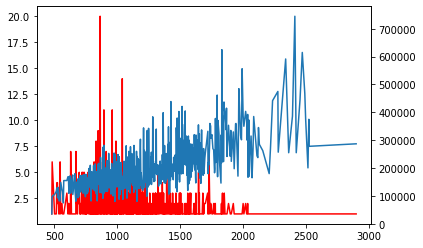

In [35]:
plt.plot(train.groupby("1st Flr SF")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("1st Flr SF")['target'].describe()["mean"])
#1층 면적

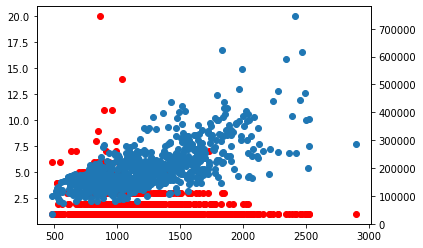

In [36]:
plt.scatter(train.groupby("1st Flr SF")['target'].describe().index, train.groupby("1st Flr SF")['target'].describe()['count'], color='red')
plt.twinx()
plt.scatter(train.groupby("1st Flr SF")['target'].describe().index, train.groupby("1st Flr SF")['target'].describe()['mean'])
#1층 면적

In [37]:
train.groupby("1st Flr SF")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
1st Flr SF,,,,,,,,
480,1.0,35311.0,NaN,35311.0,35311.0,35311.0,35311.0,35311.0
483,6.0,98150.0,12204.712205,83000.0,90750.0,97500.0,102675.0,118000.0
502,1.0,105000.0,NaN,105000.0,105000.0,105000.0,105000.0,105000.0
516,1.0,116500.0,NaN,116500.0,116500.0,116500.0,116500.0,116500.0
520,4.0,128388.0,40038.085735,68500.0,125239.0,147026.0,150175.0,151000.0
...,...,...,...,...,...,...,...,...
2497,1.0,373000.0,NaN,373000.0,373000.0,373000.0,373000.0,373000.0
2515,1.0,200624.0,NaN,200624.0,200624.0,200624.0,200624.0,200624.0
2522,1.0,375000.0,NaN,375000.0,375000.0,375000.0,375000.0,375000.0


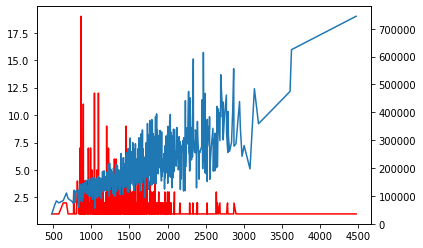

In [83]:
plt.plot(train.groupby("Gr Liv Area")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Gr Liv Area")['target'].describe()["mean"])
# 지상층 생활 면적|

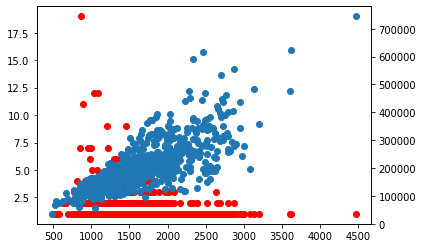

In [39]:
plt.scatter(train.groupby("Gr Liv Area")['target'].describe().index, train.groupby("Gr Liv Area")['target'].describe()['count'], color='red')
plt.twinx()
plt.scatter(train.groupby("Gr Liv Area")['target'].describe().index, train.groupby("Gr Liv Area")['target'].describe()['mean'])
# 지상층 생활 면적|

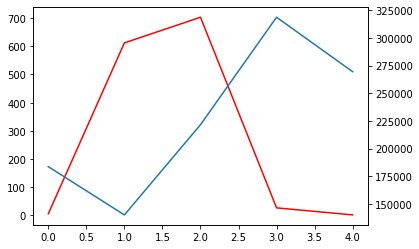

In [40]:
plt.plot(train.groupby("Full Bath")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Full Bath")['target'].describe()["mean"])
# 지상층 화장실 개수


In [41]:
train.groupby("Full Bath")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Full Bath,,,,,,,,
0,6.0,183601.166667,126523.385635,35311.0,116719.25,146668.5,247584.25,385000.0
1,612.0,139962.598039,43765.525368,12789.0,119375.00,135000.0,153000.00,615000.0
2,703.0,221542.476529,73602.278076,50000.0,173816.50,205000.0,256450.00,591587.0
3,27.0,318757.185185,148208.147824,158000.0,207500.00,290000.0,347132.50,745000.0
4,2.0,269500.000000,0.000000,269500.0,269500.00,269500.0,269500.00,269500.0


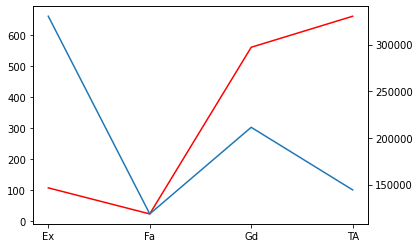

In [42]:
plt.plot(train.groupby("Kitchen Qual")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Kitchen Qual")['target'].describe()["mean"])
# 부엌 품질


In [43]:
train.groupby("Kitchen Qual")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Kitchen Qual,,,,,,,,
Ex,107.0,330451.149533,100634.148585,122250.0,277750.0,323262.0,385625.0,745000.0
Fa,23.0,118493.173913,39079.776494,55993.0,103500.0,117500.0,136000.0,242500.0
Gd,560.0,211360.892857,65014.836786,86000.0,167660.0,200912.5,245000.0,625000.0
TA,660.0,144246.675758,38586.844985,12789.0,122000.0,139725.0,162125.0,375000.0


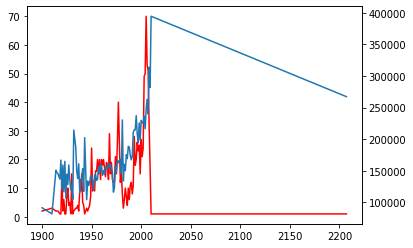

In [84]:
plt.plot(train.groupby("Garage Yr Blt")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Garage Yr Blt")['target'].describe()["mean"])
# 차고 완공 연도

In [45]:
train.groupby("Garage Yr Blt")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Garage Yr Blt,,,,,,,,
1900,2.0,91700.000000,15980.613255,80400.0,86050.00,91700.0,97350.00,103000.0
1910,3.0,81933.333333,32462.337151,50000.0,65450.00,80900.0,97900.00,114900.0
1914,2.0,150943.500000,17050.465815,138887.0,144915.25,150943.5,156971.75,163000.0
1915,2.0,147250.000000,10960.155108,139500.0,143375.00,147250.0,151125.00,155000.0
1916,2.0,145750.000000,2474.873734,144000.0,144875.00,145750.0,146625.00,147500.0
...,...,...,...,...,...,...,...,...
2007,51.0,240138.078431,71073.269426,112000.0,179470.00,230000.0,294232.00,462000.0
2008,32.0,313902.250000,84149.225420,156500.0,229681.00,322000.0,371350.25,475000.0
2009,17.0,281761.529412,90322.229473,164500.0,208300.00,264500.0,323262.00,485000.0


In [114]:
train[train["Garage Yr Blt"] == 2207]
# 차고 완공연도 2207 ????????????

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
254,255,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


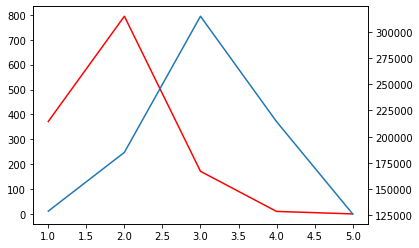

In [47]:
plt.plot(train.groupby("Garage Cars")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Garage Cars")['target'].describe()["mean"])
#  차고 자리 갯수

In [48]:
train.groupby("Garage Cars")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Garage Cars,,,,,,,,
1,372.0,129165.126344,29194.097706,35311.0,113375.0,129000.0,143000.0,257500.0
2,794.0,185109.387909,53095.994406,12789.0,148125.0,178000.0,213872.5,441929.0
3,172.0,314754.430233,98237.955204,105000.0,250750.0,310000.0,369925.0,745000.0
4,11.0,214361.727273,55968.256296,123000.0,184000.0,209200.0,267739.5,292500.0
5,1.0,126500.000000,NaN,126500.0,126500.0,126500.0,126500.0,126500.0


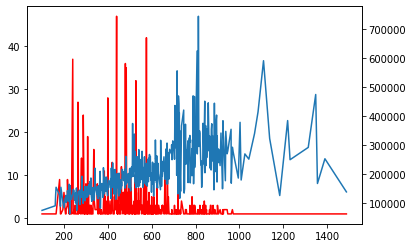

In [49]:
plt.plot(train.groupby("Garage Area")['target'].describe()["count"], color='red')
plt.twinx()
plt.plot(train.groupby("Garage Area")['target'].describe()["mean"])
#  차고 면적

In [50]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

OverallQual : 전반적 재료와 마감 품질(사용)

YearBuilt : 완공 연도(사용)

YearRemodAdd : 리모델링 연도(사용)

ExterQual : 외관 재료 품질(사용)

**BsmtQual : 지하실 높이(버림)**

TotalBsmtSF : 지하실 면적(사용)

1stFlrSF : 1층 면적(사용)

GrLivArea : 지상층 생활 면적(사용)

**FullBath : 지상층 화장실 개수(버림)**

KitchenQual : 부억 품질(사용)

**GarageYrBlt : 차고 완공 연도(완공연도랑 겹쳐서 버림)**

**GarageCars: 차고 자리 개수(버림)**

GarageArea: 차고 면적(사용)

target : 집값(달러 단위)

In [115]:
train.loc['254':'254']

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
254,255,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


In [122]:
new_data = train.drop(254, axis=0)
new_data

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [121]:



new_data = train.drop('id', axis=1)
# 걸러낸 데이터
new_data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [125]:
new_data.loc['253':'255']

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
253,254,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,113000
255,256,5,1051,TA,1,264,TA,1051,1051,TA,1,1966,1966,1966,124400


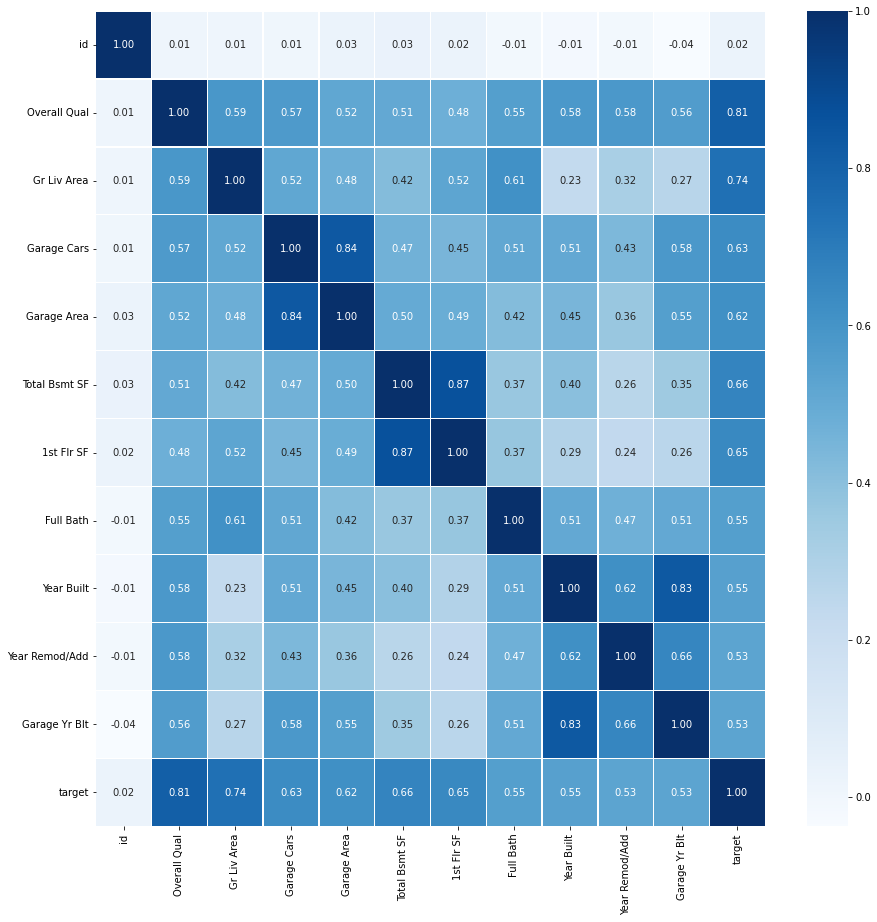

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(data = new_data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')